## 95 - Hurricane Dorian Mapping

[Youtube](https://www.youtube.com/watch?v=L3WV7dK1Ld0)

[NHC GIS Archive](https://www.nhc.noaa.gov/gis/archive_besttrack.php)

[Hurricane Dorian Best Track Files](https://www.nhc.noaa.gov/gis/archive_besttrack_results.php?id=al05&year=2019&name=Hurricane%20DORIAN)

In [1]:
import geopandas
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [2]:
track_line_gdf = geopandas.read_file('al052019_best_track/AL052019_lin.shp')
cone_gdf = geopandas.read_file('al052019_best_track/AL052019_radii.shp')
points_gdf = geopandas.read_file('al052019_best_track/AL052019_pts.shp')
ww_gdf = geopandas.read_file('al052019_best_track/AL052019_windswath.shp')

In [3]:
track_line_gdf

,STORMNUM,STORMTYPE,SS,geometry
0,5.0,TD,0.0,"LINESTRING (-46.40000 10.30000, -47.50000 10.4..."
1,5.0,TS,0.0,"LINESTRING (-48.70000 10.60000, -49.90000 10.8..."
2,5.0,HU,2.0,"LINESTRING (-65.10000 18.40000, -65.70000 19.2..."
3,5.0,LO,0.0,"LINESTRING (-65.10000 18.40000, -65.70000 19.2..."


In [4]:
map_crs = ccrs.LambertConformal(central_latitude = 35, central_longitude = -100, standard_parallels = (30, 60))
data_crs = ccrs.PlateCarree()

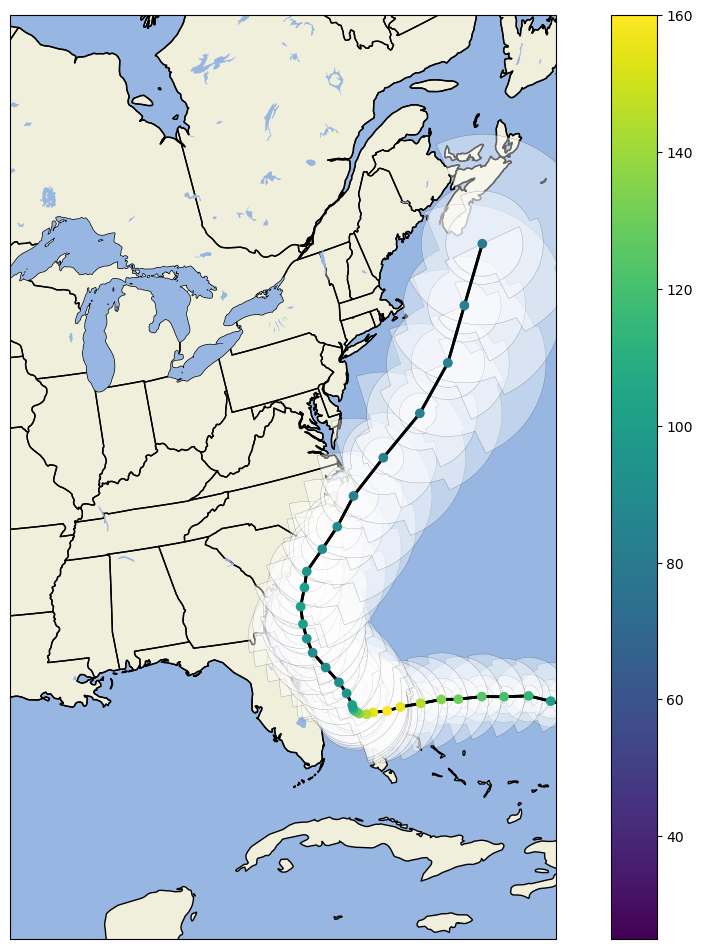

In [5]:
fig = plt.figure(figsize = (14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-90, -72, 20, 55])

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'], crs = data_crs, facecolor = 'white', edgecolor = 'black', linewidth = 0.25, alpha = 0.4)

ax.add_geometries(track_line_gdf['geometry'], crs = data_crs, facecolor = 'none', edgecolor = 'black', linewidth = 2)

sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'], transform = data_crs, zorder = 10, c = points_gdf['INTENSITY'])

# ww_colors = {'TWA': 'gold', 'HWA': 'pink', 'TWR': 'tab:blue', 'HWR': 'tab:red'}

# for ww_type in ww_colors.keys():
# 	ww_subset = ww_gdf[ww_gdf['TCWW'] == ww_type]
# 	ax.add_geometries(ww_subset['geoemtry'], facecolor = 'none', edgecolor = ww_colors[ww_type], crs = data_crs, linewidth = 5)
	
plt.colorbar(sc)